In [1]:
### Author: Leonie Küchenhoff
### Date: December 10th 2022
### Purpose of script: 
### Search for bystander edits (edits in gRNA binding region) in DNA 

In [2]:
# package import
import pandas as pd
import numpy as np
from config import basedir, outdir
import matplotlib.pyplot as plt
import seaborn as sns
import re
import logomaker
from ast import literal_eval
import os

In [3]:
os.chdir(basedir)
outdir = str(outdir + '/bystander')
print('This base directory will be used:\n', basedir)


This base directory will be used:
 /g/steinmetz/project/leonie_crispr/03_data/02_rnaseq/snakemake/


In [4]:
# sample information
names = [ 'L279', 'L450', 'L282', 'H279', 'H450', 'H282', 'T279', 'T450', 'T282']
tissue = ['liver','liver','liver','heart','heart','heart','tail','tail','tail']
base_editor = ['pbs', 'pbs', '8e-NRCH', '8e-NRCH', 'pbs', '8e-NRCH',
            'pbs', '8e-NRCH', '8e-NRCH','8e-NRCH', 'max-SpRY', 'pbs', 'pbs', 'max-SpRY', 'max-SpRY']

In [5]:
# redi files
path_redi = [f'bystander_edits/{i}.DNA_all_edits.txt' for i in names]

In [6]:
redi_files = {}
bystanders = {}
for i,j,k in zip(names, path_redi, tissue):
    '''
    for loop to read redi files and add some information
    ''' 
    file = pd.read_csv(j, sep = '\t')
    count = file['BaseCount[A,C,G,T]'].apply(lambda x: literal_eval(str(x)))
    reads = np.stack(count, axis=0 )
    file[['A','C', 'G', 'T']] = reads
    file = file[(file['Position']>=53843223)&(file['Position']<=53843265)]
    file = file.set_index('Position')
    file['tissue'] = k
    bystanders[i] = file

In [7]:
def ratio(df):
    '''
    get allele frequency per base and position
    '''
    df_r = (df.T / df.T.sum()).T
    return df_r


In [8]:
# summarize files from same condition (same mutation, same treatment) and calculate ratio of each read

heart  = bystanders['H279'][['A','C','G','T']].add(bystanders['H282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['H450'][['A','C','G','T']],axis = 'index', fill_value=0)
heart = ratio(heart)
heart.to_csv(f'{outdir}/heart_DNA.txt')

liver = bystanders['L279'][['A','C','G','T']].add(bystanders['L282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['L450'][['A','C','G','T']],axis = 'index', fill_value=0)
liver = ratio(liver)
liver.to_csv(f'{outdir}/liver_DNA.txt')

tail = bystanders['T279'][['A','C','G','T']].add(bystanders['T282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['T450'][['A','C','G','T']],axis = 'index', fill_value=0)
tail = ratio(tail)
tail.to_csv(f'{outdir}/tail_DNA.txt')


In [9]:
# plotting settings
plt.rcParams.update({'font.size':18, 'text.usetex': False,
"svg.fonttype": 'none'})

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


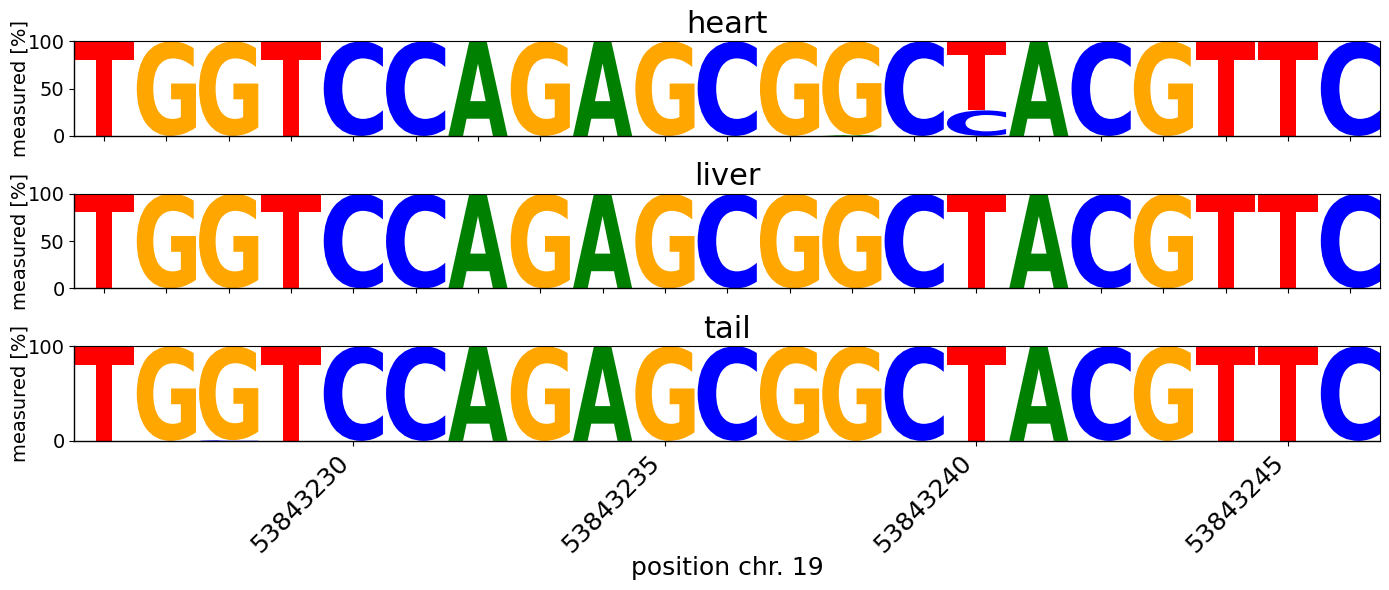

In [10]:
plt.style.use('seaborn-colorblind')
plt.style.use('default')
fig, ax = plt.subplots(3, figsize = (14,6))

crp_logo = logomaker.Logo(heart[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          ax = ax[0])
                          
crp_logo1 = logomaker.Logo(liver[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          ax = ax[1])

crp_logo2 = logomaker.Logo(tail[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          ax = ax[2])


# style using Logo methods

crp_logo.style_xticks(color = 'white', size = 1)
crp_logo1.style_xticks(color = 'white', size = 1)
crp_logo2.style_xticks(rotation=45,  anchor=0, spacing = 5, ha = 'right', size = 18)

crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo1.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo2.style_spines(spines=['left', 'bottom'], visible=True)

ax[0].set_title('heart', size = 22)
ax[1].set_title('liver', size = 22)
ax[2].set_title('tail', size = 22)

# style using Axes methods
crp_logo1.ax.set_ylabel("measured [%]", labelpad=-1, size = 14)
crp_logo2.ax.set_xlabel("position chr. 19", labelpad=-1, size = 18)

crp_logo.ax.set_ylabel("measured [%]", labelpad=-1, size = 14)
crp_logo2.ax.set_ylabel("measured [%]", labelpad=-1, size = 14)



ax[0].tick_params(axis='y', which='minor', labelsize=14)
ax[0].tick_params(axis='y', which='major', labelsize=14)
ax[1].tick_params(axis='y', which='minor', labelsize=14)
ax[1].tick_params(axis='y', which='major', labelsize=14)
ax[2].tick_params(axis='y', which='minor', labelsize=14)
ax[2].tick_params(axis='y', which='major', labelsize=14)


fig.tight_layout()
plt.savefig(f'{outdir}/bystander_DNA_all.pdf', bbox_inches = 'tight')

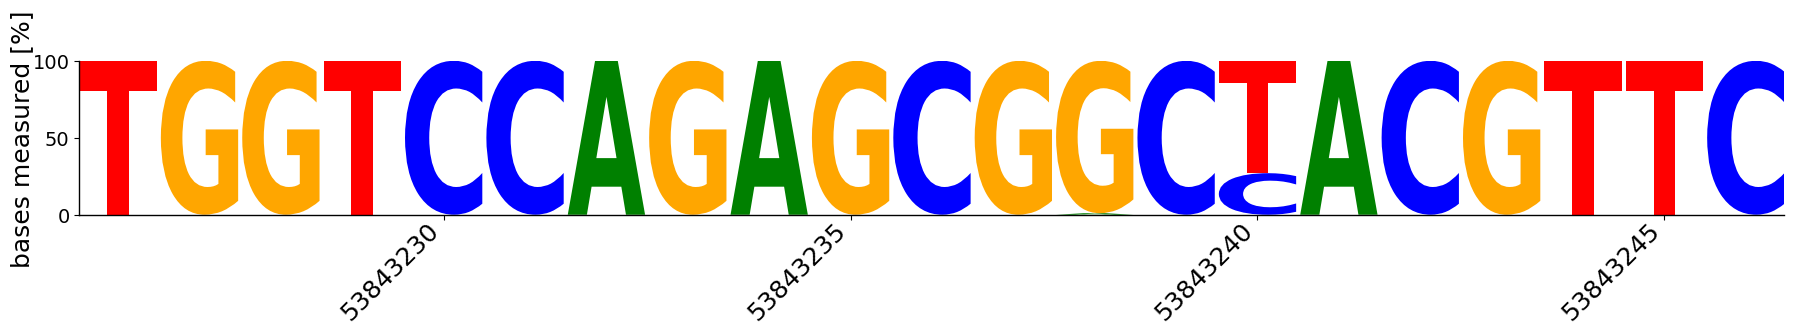

In [11]:
crp_logo = logomaker.Logo(heart[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          figsize = [22,2])

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=45,  anchor=0, spacing = 5, ha = 'right', size = 18)


# style using Axes methods
crp_logo.ax.set_ylabel("bases measured [%]", labelpad=-1, size = 18)
crp_logo.ax.xaxis.set_tick_params(pad=-1)


crp_logo.ax.tick_params(axis='y', which='minor', labelsize=14)
crp_logo.ax.tick_params(axis='y', which='major', labelsize=14)


plt.savefig(f'{outdir}/DNA_p635l_8e_heart.pdf', bbox_inches = 'tight')

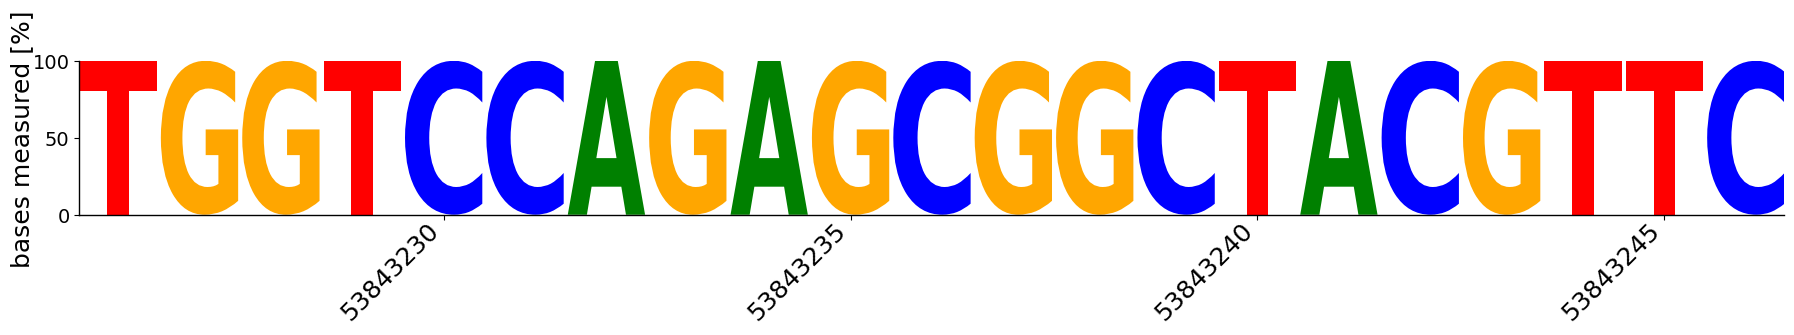

In [12]:
crp_logo = logomaker.Logo(liver[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          figsize = [22,2])

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=45,  anchor=0, spacing = 5, ha = 'right', size = 18)


crp_logo.ax.tick_params(axis='y', which='minor', labelsize=14)
crp_logo.ax.tick_params(axis='y', which='major', labelsize=14)


# style using Axes methods
crp_logo.ax.set_ylabel("bases measured [%]", labelpad=-1, size = 18)
crp_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(f'{outdir}/DNA_p635l_8e_liver.pdf', bbox_inches = 'tight')

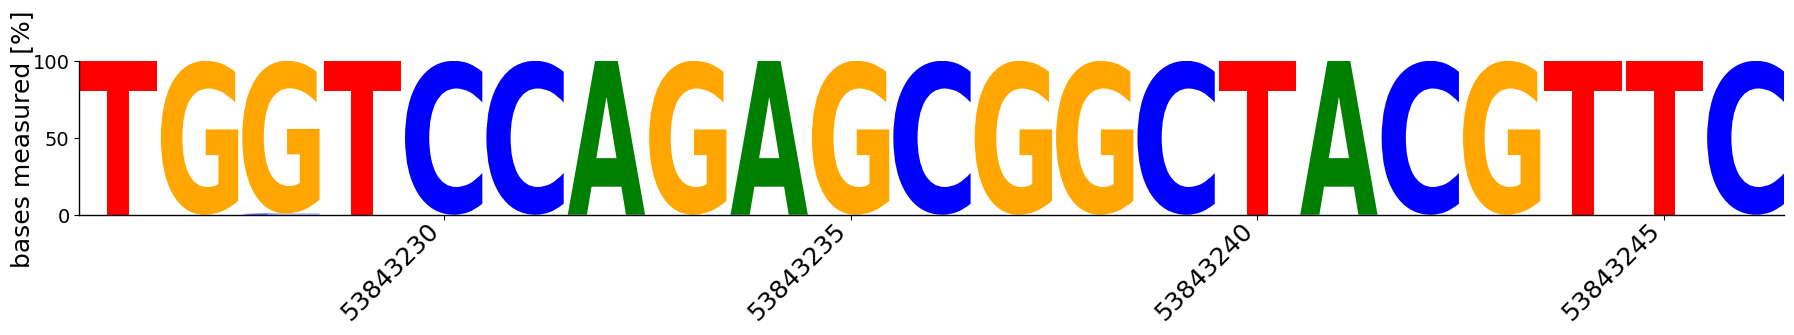

In [13]:
crp_logo = logomaker.Logo(tail[3:24]*100,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          figsize = [22,2])

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=45,  anchor=0, spacing = 5, ha = 'right', size = 18)


crp_logo.ax.tick_params(axis='y', which='minor', labelsize=14)
crp_logo.ax.tick_params(axis='y', which='major', labelsize=14)


# style using Axes methods
crp_logo.ax.set_ylabel("bases measured [%]", labelpad=-1, size = 18)
crp_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(f'{outdir}/DNA_p635l_8e_tail.pdf', bbox_inches = 'tight')

In [21]:
heart  = bystanders['H279'][['A','C','G','T']].add(bystanders['H282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['H450'][['A','C','G','T']],axis = 'index', fill_value=0)
heart = ratio(heart)

liver = bystanders['L279'][['A','C','G','T']].add(bystanders['L282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['L450'][['A','C','G','T']],axis = 'index', fill_value=0)
liver = ratio(liver)

tail = bystanders['T279'][['A','C','G','T']].add(bystanders['T282'][['A','C','G','T']],axis = 'index', fill_value=0).add(bystanders['T450'][['A','C','G','T']],axis = 'index', fill_value=0)
tail = ratio(tail)

In [48]:
# positions of adenines / thymines around on-target site
adenines = [53843232, 53843234, 53843241]
adenines_r = [53843241, 53843250, 53843251, 53843256, 53843257]
thymines = [53843226, 53843229, 53843244, 53843245]
thymines_r = [53843245, 53843247, 53843253,53843258]


# summarize files from same condition (same mutation, same treatment) and calculate ratio of each read for only positions of interest
heart_sep = pd.concat([ratio(bystanders['H282'][['A','C','G','T']]), ratio(bystanders['H279'][['A','C','G','T']]), ratio(bystanders['H450'][['A','C','G','T']])], keys = ['H282','H279','H450']).reset_index().rename(columns = {'level_0':'sample'})
heart_AG = heart_sep[heart_sep['Position'].isin(adenines)]
heart_TC = heart_sep[heart_sep['Position'].isin(thymines)]

heart_AG.to_csv(f'{outdir}/heart_AG_DNA.txt')
heart_TC.to_csv(f'{outdir}/heart_TC_DNA.txt')

liver_sep = pd.concat([ratio(bystanders['L282'][['A','C','G','T']]), ratio(bystanders['L279'][['A','C','G','T']]), ratio(bystanders['L450'][['A','C','G','T']])], keys = ['L282','L279','L450']).reset_index().rename(columns = {'level_0':'sample'})
liver_AG = liver_sep[liver_sep['Position'].isin(adenines)]
liver_TC = liver_sep[liver_sep['Position'].isin(thymines)]


liver_AG.to_csv(f'{outdir}/liver_AG_DNA.txt')
liver_TC.to_csv(f'{outdir}/liver_TC_DNA.txt')


tail_sep = pd.concat([ratio(bystanders['T282'][['A','C','G','T']]), ratio(bystanders['T279'][['A','C','G','T']]), ratio(bystanders['T450'][['A','C','G','T']])], keys = ['T282','T279','T450']).reset_index().rename(columns = {'level_0':'sample'})
tail_AG = tail_sep[tail_sep['Position'].isin(adenines)]
tail_TC = tail_sep[tail_sep['Position'].isin(thymines)]


tail_AG.to_csv(f'{outdir}/tail_AG_DNA.txt')
tail_TC.to_csv(f'{outdir}/tail_TC_DNA.txt')

In [61]:
# plotting settings
plt.rcParams.update({'font.size':18, 'text.usetex': False,
"svg.fonttype": 'none'})

In [53]:
heart_AG

,sample,Position,A,C,G,T
9,H282,53843232,1.0,0.0,0.0,0.0
11,H282,53843234,1.0,0.0,0.0,0.0
18,H282,53843241,1.0,0.0,0.0,0.0
52,H279,53843232,1.0,0.0,0.0,0.0
54,H279,53843234,1.0,0.0,0.0,0.0
61,H279,53843241,1.0,0.0,0.0,0.0
95,H450,53843232,1.0,0.0,0.0,0.0
97,H450,53843234,1.0,0.0,0.0,0.0
104,H450,53843241,1.0,0.0,0.0,0.0


(-0.1, 1.1)

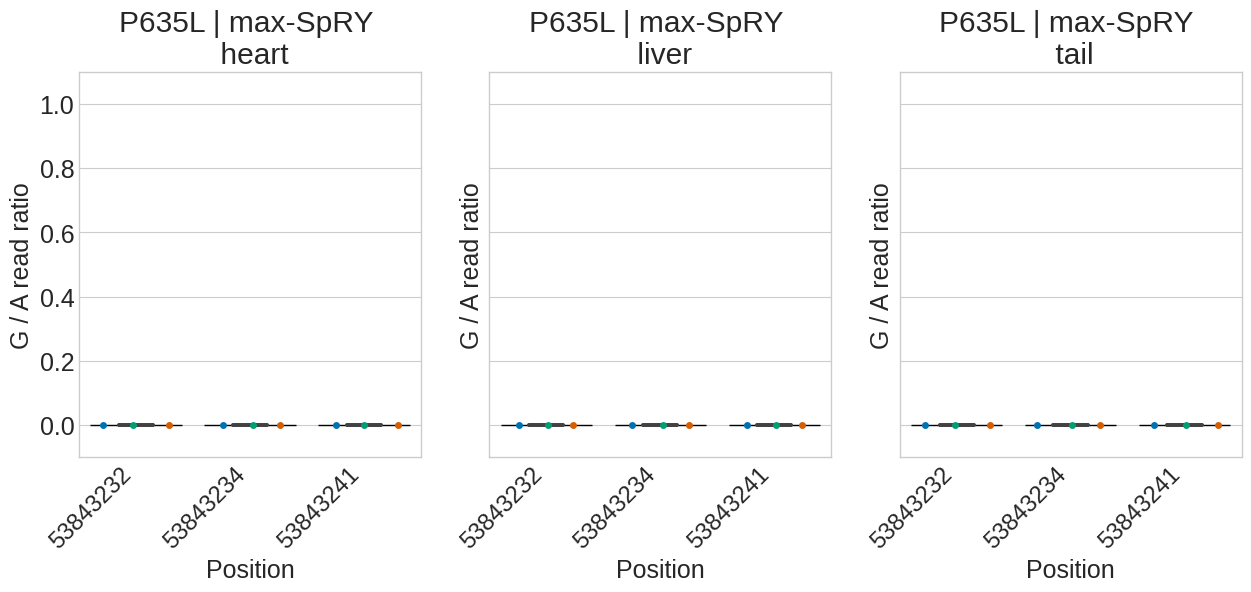

In [62]:
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True, sharex =True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')


sns.barplot(data = heart_AG, y = 'G',x = 'Position', color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[0])
plot1 = sns.stripplot(data = heart_AG, y = 'G',x = 'Position', hue = 'sample', ax = ax[0], dodge = True)
sns.barplot(data = liver_AG, y = 'G',x = 'Position', color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[1])
plot2 = sns.stripplot(data = liver_AG, y = 'G',x = 'Position', hue = 'sample', ax = ax[1], dodge = True)
sns.barplot(data = tail_AG, y = 'G',x = 'Position', color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[2])
plot3 = sns.stripplot(data = tail_AG, y = 'G',x = 'Position', hue = 'sample', ax = ax[2], dodge = True)


plot1.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
plot2.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
plot3.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
                        
ax[0].set_title(f'P635L | max-SpRY \n heart')
ax[1].set_title('P635L | max-SpRY \n liver')
ax[2].set_title('P635L | max-SpRY \n tail')

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()



ax[0].set_ylabel('G / A read ratio')
ax[1].set_ylabel('G / A read ratio')
ax[2].set_ylabel('G / A read ratio')

ax[0].set_ylim(-0.1,1.1)

#fig.savefig(f'{outdir}/R635L_bystander_bar_AG_DNA.pdf', bbox_inches = 'tight')
#fig.savefig(f'{outdir}/R635L_bystander_bar_AG_DNA.svg', bbox_inches = 'tight')

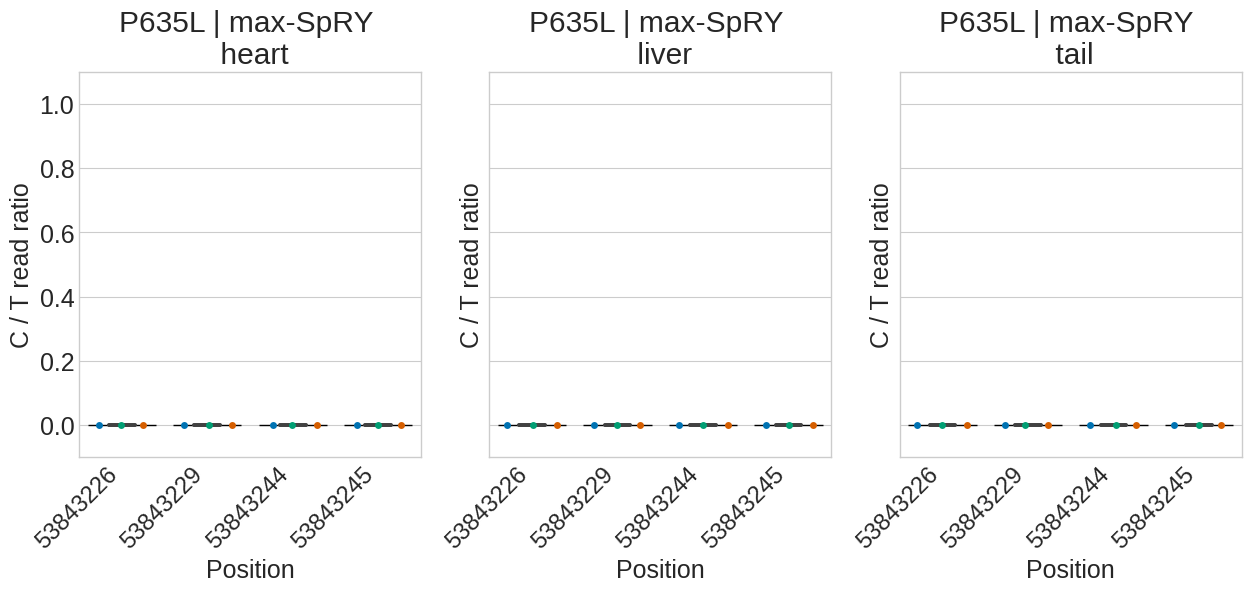

In [63]:
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True, sharex =True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')


sns.barplot(data = heart_TC, y = 'C',x = 'Position', color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[0])
plot1 = sns.stripplot(data = heart_TC, y = 'C',x = 'Position', hue = 'sample', ax = ax[0], dodge = True)
sns.barplot(data = liver_TC, y = 'C',x = 'Position',color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[1])
plot2 = sns.stripplot(data = liver_TC, y = 'C',x = 'Position', hue = 'sample', ax = ax[1], dodge = True)
sns.barplot(data = tail_TC, y = 'C',x = 'Position', color = 'lightgrey',edgecolor = "black", capsize = 0.3, ax = ax[2])
plot3 = sns.stripplot(data = tail_TC, y = 'C',x = 'Position', hue = 'sample', ax = ax[2], dodge = True)


plot1.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
plot2.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
plot3.set_xticklabels(plot2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right',
                          fontsize = 17)
                        
ax[0].set_title(f'P635L | max-SpRY \n heart')
ax[1].set_title('P635L | max-SpRY \n liver')
ax[2].set_title('P635L | max-SpRY \n tail')

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()



ax[0].set_ylabel('C / T read ratio')
ax[1].set_ylabel('C / T read ratio')
ax[2].set_ylabel('C / T read ratio')


ax[0].set_ylim(-0.1,1.1)

fig.savefig(f'{outdir}/R635L_bystander_bar_TC_DNA.pdf', bbox_inches = 'tight')
fig.savefig(f'{outdir}/R635L_bystander_bar_TC_DNA.svg', bbox_inches = 'tight')